# Section 1: Setup and Initialization
What it does:
- Loads all the tools we need (like a calculator, drawing tools, and colorful text)
- Sets up pretty colors and styles for our charts
- Creates a helper function to print colored messages

Why it matters: This is like setting up your workspace before starting a project.

In [1]:
import re
import json
from typing import Dict, List, Tuple, Optional, Any
from dataclasses import dataclass, field
from enum import Enum
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from datetime import datetime

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Print colored text in Colab
def print_colored(text, color='blue'):
    colors = {
        'blue': '#1f77b4',
        'green': '#2ca02c',
        'red': '#d62728',
        'orange': '#ff7f0e',
        'purple': '#9467bd'
    }
    display(HTML(f'<p style="color: {colors.get(color, colors["blue"])}; font-weight: bold;">{text}</p>'))

print_colored("✅ Setup complete! All libraries loaded successfully.", 'green')

# Section 2: Model Profiles Database
## What it does:
- Creates a "menu" of all available AI models
Lists each model's:
- Price (some cost pennies, others cost dollars)
- Speed (like a sports car vs. a truck)
- Quality (like student work vs. professor work)
- Special abilities (can it see images? How much text can it handle?)

## Groups models into 5 tiers:
- Nano: Super fast, super cheap, but basic (like a calculator)
- Micro: Still fast and cheap, but smarter
- Standard: Good at most things (like a reliable sedan)
- Premium: High quality, more expensive
- Expert: The best of the best (like hiring a PhD)


Why it matters: You need to know your options before choosing!


In [2]:
# Define enums for task types and model capabilities
class TaskComplexity(Enum):
    SIMPLE = 1
    MODERATE = 2
    COMPLEX = 3
    ADVANCED = 4

class ModelTier(Enum):
    NANO = "nano"          # Smallest, fastest models
    MICRO = "micro"        # Small but capable
    STANDARD = "standard"  # Balanced performance
    PREMIUM = "premium"    # High performance
    EXPERT = "expert"      # Top tier

@dataclass
class ModelProfile:
    """Complete profile for an AI model"""
    name: str
    provider: str
    tier: ModelTier
    cost_per_1k_input: float
    cost_per_1k_output: float
    context_window: int
    strengths: List[str]
    weaknesses: List[str]
    best_for: List[str]
    speed_rating: int  # 1-5, 5 being fastest
    quality_rating: int  # 1-5, 5 being best
    supports_vision: bool = False
    supports_function_calling: bool = False
    supports_streaming: bool = True
    knowledge_cutoff: str = "2023"

    @property
    def avg_cost_per_1k(self):
        """Average cost between input and output"""
        return (self.cost_per_1k_input + self.cost_per_1k_output) / 2

# Initialize model database
MODEL_DATABASE = {
    # Nano Tier - Smallest, fastest models
    "claude-3-haiku": ModelProfile(
        name="Claude 3 Haiku",
        provider="Anthropic",
        tier=ModelTier.NANO,
        cost_per_1k_input=0.00025,
        cost_per_1k_output=0.00125,
        context_window=200000,
        strengths=["Ultra-fast", "Very cheap", "Great for simple tasks", "Huge context"],
        weaknesses=["Limited reasoning", "Basic responses"],
        best_for=["Classification", "Simple Q&A", "Quick summaries", "Bulk processing"],
        speed_rating=5,
        quality_rating=2,
        knowledge_cutoff="2024-04"
    ),

    "gpt-3.5-turbo": ModelProfile(
        name="GPT-3.5 Turbo",
        provider="OpenAI",
        tier=ModelTier.NANO,
        cost_per_1k_input=0.0005,
        cost_per_1k_output=0.0015,
        context_window=16385,
        strengths=["Fast", "Affordable", "Well-rounded"],
        weaknesses=["Older model", "Limited context", "Can hallucinate"],
        best_for=["Chatbots", "Simple content", "Quick tasks"],
        speed_rating=5,
        quality_rating=2,
        supports_function_calling=True,
        knowledge_cutoff="2021-09"
    ),

    # Micro Tier - Small but more capable
    "gpt-4o-mini": ModelProfile(
        name="GPT-4o Mini",
        provider="OpenAI",
        tier=ModelTier.MICRO,
        cost_per_1k_input=0.00015,
        cost_per_1k_output=0.0006,
        context_window=128000,
        strengths=["Extremely cheap", "Good performance", "Multimodal", "Large context"],
        weaknesses=["Not for complex reasoning", "Limited creativity"],
        best_for=["General tasks", "Light analysis", "Image understanding", "Bulk work"],
        speed_rating=4,
        quality_rating=3,
        supports_vision=True,
        supports_function_calling=True,
        knowledge_cutoff="2023-10"
    ),

    "gemini-1.5-flash": ModelProfile(
        name="Gemini 1.5 Flash",
        provider="Google",
        tier=ModelTier.MICRO,
        cost_per_1k_input=0.00035,
        cost_per_1k_output=0.00105,
        context_window=1000000,
        strengths=["Massive context", "Fast", "Multimodal", "Good value"],
        weaknesses=["Inconsistent quality", "Can be verbose"],
        best_for=["Document analysis", "Long conversations", "Multimodal tasks"],
        speed_rating=4,
        quality_rating=3,
        supports_vision=True,
        knowledge_cutoff="2024-04"
    ),

    # Standard Tier - Balanced models
    "claude-3-sonnet": ModelProfile(
        name="Claude 3.5 Sonnet",
        provider="Anthropic",
        tier=ModelTier.STANDARD,
        cost_per_1k_input=0.003,
        cost_per_1k_output=0.015,
        context_window=200000,
        strengths=["Excellent balance", "Strong reasoning", "Great writing", "Reliable"],
        weaknesses=["More expensive", "Not the absolute best"],
        best_for=["Professional writing", "Code generation", "Analysis", "General excellence"],
        speed_rating=3,
        quality_rating=4,
        knowledge_cutoff="2024-04"
    ),

    "gpt-4o": ModelProfile(
        name="GPT-4o",
        provider="OpenAI",
        tier=ModelTier.STANDARD,
        cost_per_1k_input=0.0025,
        cost_per_1k_output=0.01,
        context_window=128000,
        strengths=["Multimodal native", "Fast for its tier", "Excellent reasoning"],
        weaknesses=["Expensive for simple tasks", "Can be verbose"],
        best_for=["Complex analysis", "Vision tasks", "Professional work", "Coding"],
        speed_rating=3,
        quality_rating=4,
        supports_vision=True,
        supports_function_calling=True,
        knowledge_cutoff="2024-04"
    ),

    # Premium Tier - High-end models
    "gpt-4-turbo": ModelProfile(
        name="GPT-4 Turbo",
        provider="OpenAI",
        tier=ModelTier.PREMIUM,
        cost_per_1k_input=0.01,
        cost_per_1k_output=0.03,
        context_window=128000,
        strengths=["Top-tier reasoning", "Excellent coding", "Reliable", "Detailed"],
        weaknesses=["Expensive", "Slower", "Overkill for simple tasks"],
        best_for=["Complex coding", "Technical writing", "Research", "Expert tasks"],
        speed_rating=2,
        quality_rating=5,
        supports_vision=True,
        supports_function_calling=True,
        knowledge_cutoff="2024-04"
    ),

    "gemini-1.5-pro": ModelProfile(
        name="Gemini 1.5 Pro",
        provider="Google",
        tier=ModelTier.PREMIUM,
        cost_per_1k_input=0.00125,
        cost_per_1k_output=0.00375,
        context_window=2000000,
        strengths=["Massive context window", "Multimodal", "Good reasoning"],
        weaknesses=["Can be inconsistent", "API limitations"],
        best_for=["Long document analysis", "Video understanding", "Research"],
        speed_rating=2,
        quality_rating=4,
        supports_vision=True,
        knowledge_cutoff="2024-04"
    ),

    # Expert Tier - Top models
    "claude-3-opus": ModelProfile(
        name="Claude 3 Opus",
        provider="Anthropic",
        tier=ModelTier.EXPERT,
        cost_per_1k_input=0.015,
        cost_per_1k_output=0.075,
        context_window=200000,
        strengths=["Best reasoning", "Excellent writing", "Deep understanding", "Nuanced"],
        weaknesses=["Very expensive", "Slower", "Overkill for most tasks"],
        best_for=["Complex reasoning", "Creative writing", "Expert analysis", "Research"],
        speed_rating=1,
        quality_rating=5,
        knowledge_cutoff="2024-04"
    ),

    "gpt-4": ModelProfile(
        name="GPT-4",
        provider="OpenAI",
        tier=ModelTier.EXPERT,
        cost_per_1k_input=0.03,
        cost_per_1k_output=0.06,
        context_window=8192,
        strengths=["Original GPT-4 quality", "Very reliable", "Excellent reasoning"],
        weaknesses=["Small context", "Very expensive", "Slow"],
        best_for=["When quality is paramount", "Complex reasoning", "Difficult tasks"],
        speed_rating=1,
        quality_rating=5,
        supports_function_calling=True,
        knowledge_cutoff="2023-04"
    ),
}

# Create a quick reference DataFrame
model_df = pd.DataFrame([
    {
        'Model': k,
        'Provider': v.provider,
        'Tier': v.tier.value,
        'Avg Cost/1K': f"${v.avg_cost_per_1k:.4f}",
        'Context': f"{v.context_window:,}",
        'Speed': '⚡' * v.speed_rating,
        'Quality': '⭐' * v.quality_rating,
        'Vision': '✅' if v.supports_vision else '❌'
    }
    for k, v in MODEL_DATABASE.items()
])

print_colored("📊 Model Database Loaded!", 'green')
display(model_df)

,Model,Provider,Tier,Avg Cost/1K,Context,Speed,Quality,Vision
0,claude-3-haiku,Anthropic,nano,$0.0008,"200,000",⚡⚡⚡⚡⚡,⭐⭐,❌
1,gpt-3.5-turbo,OpenAI,nano,$0.0010,"16,385",⚡⚡⚡⚡⚡,⭐⭐,❌
2,gpt-4o-mini,OpenAI,micro,$0.0004,"128,000",⚡⚡⚡⚡,⭐⭐⭐,✅
3,gemini-1.5-flash,Google,micro,$0.0007,"1,000,000",⚡⚡⚡⚡,⭐⭐⭐,✅
4,claude-3-sonnet,Anthropic,standard,$0.0090,"200,000",⚡⚡⚡,⭐⭐⭐⭐,❌
5,gpt-4o,OpenAI,standard,$0.0063,"128,000",⚡⚡⚡,⭐⭐⭐⭐,✅
6,gpt-4-turbo,OpenAI,premium,$0.0200,"128,000",⚡⚡,⭐⭐⭐⭐⭐,✅
7,gemini-1.5-pro,Google,premium,$0.0025,"2,000,000",⚡⚡,⭐⭐⭐⭐,✅
8,claude-3-opus,Anthropic,expert,$0.0450,"200,000",⚡,⭐⭐⭐⭐⭐,❌
9,gpt-4,OpenAI,expert,$0.0450,"8,192",⚡,⭐⭐⭐⭐⭐,❌


# Section 3: Prompt Analysis Engine
## What it does:
- Reads your question/task and figures out how hard it is
- Looks for clues like:
    - Simple words ("what is", "list") = Easy task
    - Complex words ("analyze", "create") = Hard task
    - Code words ("function", "debug") = Programming task
    - Creative words ("story", "imagine") = Creative task

Gives your task a difficulty score from 0-10
Identifies special needs (like "I need to analyze an image")

Why it matters: A simple "What's 2+2?" doesn't need the same AI power as "Write a business plan"!

In [3]:
class PromptAnalyzer:
    """Analyzes prompts to determine their characteristics and requirements"""

    def __init__(self):
        self.complexity_patterns = {
            'simple': {
                'keywords': [
                    r'\b(what is|define|translate|list|name|when|where)\b',
                    r'\b(yes or no|true or false|simple|basic|quick)\b',
                    r'\b(fact|date|number|count)\b'
                ],
                'weight': -1.0
            },
            'moderate': {
                'keywords': [
                    r'\b(explain|describe|summarize|compare|how|why)\b',
                    r'\b(advantages?|disadvantages?|pros and cons|differences?)\b',
                    r'\b(analyze briefly|overview|outline)\b'
                ],
                'weight': 0.5
            },
            'complex': {
                'keywords': [
                    r'\b(analyze|evaluate|assess|critique|review)\b',
                    r'\b(implement|create|design|develop|build)\b',
                    r'\b(comprehensive|detailed|in-depth|thorough)\b',
                    r'\b(step.by.step|algorithm|process|method)\b'
                ],
                'weight': 1.5
            },
            'advanced': {
                'keywords': [
                    r'\b(research|investigate|hypothesize|theorize)\b',
                    r'\b(expert|professional|academic|scholarly)\b',
                    r'\b(novel|innovative|creative|original)\b',
                    r'\b(thesis|dissertation|paper|publication)\b'
                ],
                'weight': 2.0
            }
        }

        self.domain_patterns = {
            'coding': [
                r'\b(code|function|class|debug|algorithm|implement)\b',
                r'\b(python|javascript|java|cpp|sql|program)\b',
                r'```[\s\S]*```',  # Code blocks
                r'\b(def|function|class|import|return)\b'
            ],
            'creative': [
                r'\b(story|poem|creative|imagine|fiction)\b',
                r'\b(character|plot|narrative|dialogue)\b',
                r'\b(write a.*story|create a.*poem)\b'
            ],
            'academic': [
                r'\b(research|paper|thesis|citation|study)\b',
                r'\b(hypothesis|methodology|conclusion)\b',
                r'\b(peer.review|journal|publication)\b'
            ],
            'business': [
                r'\b(business|marketing|strategy|roi|kpi)\b',
                r'\b(proposal|presentation|report|email)\b',
                r'\b(stakeholder|customer|client|market)\b'
            ],
            'technical': [
                r'\b(technical|engineering|architecture|system)\b',
                r'\b(specification|documentation|diagram)\b',
                r'\b(api|database|infrastructure|deployment)\b'
            ],
            'vision': [
                r'\b(image|picture|photo|visual|look at|see)\b',
                r'\b(describe.*image|analyze.*photo|what.*picture)\b',
                r'\b(diagram|chart|graph|illustration)\b'
            ]
        }

    def analyze(self, prompt: str) -> Dict[str, Any]:
        """Comprehensive prompt analysis"""
        prompt_lower = prompt.lower()

        # Calculate complexity score
        complexity_score = self._calculate_complexity(prompt_lower)

        # Detect domains
        domains = self._detect_domains(prompt_lower)

        # Analyze requirements
        requirements = {
            'needs_vision': 'vision' in domains,
            'needs_coding': 'coding' in domains,
            'needs_creativity': 'creative' in domains,
            'needs_large_context': len(prompt.split()) > 1000,
            'needs_recent_knowledge': bool(re.search(r'\b(2024|recent|latest|current)\b', prompt_lower)),
            'needs_citations': bool(re.search(r'\b(cite|source|reference|research)\b', prompt_lower)),
            'is_conversation': bool(re.search(r'\b(chat|talk|discuss|conversation)\b', prompt_lower)),
            'needs_speed': bool(re.search(r'\b(quick|fast|asap|urgent)\b', prompt_lower)),
            'needs_accuracy': bool(re.search(r'\b(accurate|precise|exact|critical)\b', prompt_lower))
        }

        # Estimate output length
        output_length = self._estimate_output_length(prompt_lower)

        # Determine task type
        task_type = self._determine_task_type(prompt_lower)

        return {
            'prompt': prompt,
            'word_count': len(prompt.split()),
            'complexity_score': complexity_score,
            'complexity_level': self._score_to_level(complexity_score),
            'domains': domains,
            'requirements': requirements,
            'estimated_output_length': output_length,
            'task_type': task_type,
            'analysis_timestamp': datetime.now().isoformat()
        }

    def _calculate_complexity(self, prompt: str) -> float:
        """Calculate complexity score (0-10)"""
        base_score = 3.0

        # Check complexity patterns
        for level, config in self.complexity_patterns.items():
            for pattern in config['keywords']:
                matches = len(re.findall(pattern, prompt))
                if matches:
                    base_score += config['weight'] * min(matches, 3)

        # Length factors
        words = len(prompt.split())
        if words < 20:
            base_score -= 1
        elif words > 100:
            base_score += 1
        elif words > 300:
            base_score += 2

        # Multi-step detection
        steps = len(re.findall(r'\b(step \d+|first|second|then|finally|next)\b', prompt))
        base_score += steps * 0.5

        # Technical depth
        technical_terms = len(re.findall(
            r'\b(algorithm|optimization|architecture|implementation|analysis)\b',
            prompt
        ))
        base_score += technical_terms * 0.3

        return max(0, min(10, base_score))

    def _detect_domains(self, prompt: str) -> List[str]:
        """Detect which domains the prompt belongs to"""
        detected = []

        for domain, patterns in self.domain_patterns.items():
            for pattern in patterns:
                if re.search(pattern, prompt):
                    detected.append(domain)
                    break

        return detected

    def _estimate_output_length(self, prompt: str) -> str:
        """Estimate expected output length"""
        if re.search(r'\b(brief|short|concise|summary)\b', prompt):
            return "short"
        elif re.search(r'\b(essay|article|report|detailed|comprehensive)\b', prompt):
            return "long"
        elif re.search(r'\b(paragraph|explain)\b', prompt):
            return "medium"
        else:
            return "medium"

    def _determine_task_type(self, prompt: str) -> str:
        """Determine the primary task type"""
        task_patterns = {
            'question_answering': r'\b(what|when|where|who|why|how|is|are|can|will)\b.*\?',
            'generation': r'\b(write|create|generate|compose|draft)\b',
            'analysis': r'\b(analyze|evaluate|assess|review|critique)\b',
            'translation': r'\b(translate|convert.*language)\b',
            'summarization': r'\b(summarize|summary|brief|key points)\b',
            'coding': r'\b(code|implement|function|debug|program)\b',
            'conversation': r'\b(chat|discuss|talk|respond)\b',
            'classification': r'\b(categorize|classify|identify|label)\b'
        }

        for task, pattern in task_patterns.items():
            if re.search(pattern, prompt):
                return task

        return 'general'

    def _score_to_level(self, score: float) -> str:
        """Convert numerical score to complexity level"""
        if score < 2.5:
            return "Simple"
        elif score < 5:
            return "Moderate"
        elif score < 7.5:
            return "Complex"
        else:
            return "Advanced"

# Initialize the analyzer
analyzer = PromptAnalyzer()
print_colored("🔍 Prompt Analyzer Ready!", 'green')

# Section 4: Model Routing Logic
What it does:
- Takes the analysis from Section 3
- Matches your task to the best model using rules like:
    - Simple task → Cheap, fast model
    - Complex task → Powerful, smart model
    - Image task → Model that can "see"
    - Long document → Model with big memory


Explains WHY it picked that model
Suggests backup options
Warns you if you're overspending (like using a Ferrari for grocery shopping)
Estimates how much it will cost

Why it matters: This is the brain that makes smart money-saving decisions!

In [4]:
class ModelRouter:
    """Routes prompts to the most appropriate model"""

    def __init__(self, analyzer: PromptAnalyzer, model_db: Dict[str, ModelProfile]):
        self.analyzer = analyzer
        self.model_db = model_db

    def route(self,
              prompt: str,
              max_cost: Optional[float] = None,
              prefer_speed: bool = False,
              prefer_quality: bool = False,
              required_features: List[str] = None) -> Dict[str, Any]:
        """
        Route a prompt to the best model based on analysis and preferences

        Args:
            prompt: The prompt to route
            max_cost: Maximum cost per 1K tokens (average of input/output)
            prefer_speed: Prioritize faster models
            prefer_quality: Prioritize higher quality models
            required_features: List of required features ['vision', 'function_calling']

        Returns:
            Routing recommendation with reasoning
        """
        # Analyze the prompt
        analysis = self.analyzer.analyze(prompt)

        # Get eligible models
        eligible = self._filter_eligible_models(analysis, max_cost, required_features)

        if not eligible:
            return {
                'error': 'No models meet the specified requirements',
                'analysis': analysis,
                'suggestions': self._get_fallback_suggestions(analysis, max_cost)
            }

        # Score models
        scored_models = self._score_models(eligible, analysis, prefer_speed, prefer_quality)

        # Get top recommendation
        best_model = scored_models[0]
        alternatives = scored_models[1:4]  # Top 3 alternatives

        # Generate reasoning
        reasoning = self._generate_reasoning(best_model, analysis, prefer_speed, prefer_quality)

        # Calculate estimated costs
        estimated_costs = self._estimate_costs(best_model[0], analysis)

        return {
            'recommended_model': best_model[0],
            'model_profile': self.model_db[best_model[0]],
            'score': best_model[1],
            'reasoning': reasoning,
            'alternatives': [
                {
                    'model': alt[0],
                    'score': alt[1],
                    'why_alternative': self._why_alternative(best_model[0], alt[0])
                }
                for alt in alternatives
            ],
            'analysis': analysis,
            'estimated_costs': estimated_costs,
            'warnings': self._generate_warnings(best_model[0], analysis)
        }

    def _filter_eligible_models(self,
                               analysis: Dict[str, Any],
                               max_cost: Optional[float],
                               required_features: Optional[List[str]]) -> List[str]:
        """Filter models based on requirements"""
        eligible = []
        requirements = analysis['requirements']

        for model_id, profile in self.model_db.items():
            # Check cost constraint
            if max_cost and profile.avg_cost_per_1k > max_cost:
                continue

            # Check vision requirement
            if requirements['needs_vision'] and not profile.supports_vision:
                continue

            # Check feature requirements
            if required_features:
                if 'vision' in required_features and not profile.supports_vision:
                    continue
                if 'function_calling' in required_features and not profile.supports_function_calling:
                    continue

            # Check context window
            if requirements['needs_large_context'] and profile.context_window < 50000:
                continue

            eligible.append(model_id)

        return eligible

    def _score_models(self,
                     eligible: List[str],
                     analysis: Dict[str, Any],
                     prefer_speed: bool,
                     prefer_quality: bool) -> List[Tuple[str, float]]:
        """Score eligible models"""
        scores = []

        complexity_map = {
            'Simple': ModelTier.NANO,
            'Moderate': ModelTier.MICRO,
            'Complex': ModelTier.STANDARD,
            'Advanced': ModelTier.PREMIUM
        }

        ideal_tier = complexity_map.get(analysis['complexity_level'], ModelTier.STANDARD)

        for model_id in eligible:
            profile = self.model_db[model_id]
            score = 0.0

            # Complexity match scoring (most important)
            tier_diff = list(ModelTier).index(profile.tier) - list(ModelTier).index(ideal_tier)
            if tier_diff == 0:
                score += 5.0  # Perfect match
            elif tier_diff == 1:
                score += 3.0  # Slightly overqualified
            elif tier_diff == -1:
                score += 2.0  # Slightly underqualified
            elif tier_diff > 1:
                score += 0.5  # Too overqualified (wasteful)
            else:
                score += 0.0  # Too underqualified

            # Domain matching
            domains = analysis['domains']
            for domain in domains:
                if domain == 'coding' and any('cod' in s.lower() for s in profile.best_for):
                    score += 2.0
                elif domain == 'creative' and any('creativ' in s.lower() for s in profile.best_for):
                    score += 2.0
                elif domain == 'academic' and any('research' in s.lower() for s in profile.best_for):
                    score += 1.5
                elif domain == 'business' and any('professional' in s.lower() for s in profile.best_for):
                    score += 1.5

            # Speed vs Quality preferences
            if prefer_speed:
                score += profile.speed_rating * 0.8
            elif prefer_quality:
                score += profile.quality_rating * 0.8
            else:
                # Balanced approach
                score += (profile.speed_rating + profile.quality_rating) * 0.3

            # Cost efficiency
            cost_efficiency = 1.0 / (profile.avg_cost_per_1k + 0.001)
            score += min(cost_efficiency * 0.1, 2.0)  # Cap cost bonus

            # Special requirements
            requirements = analysis['requirements']
            if requirements['needs_accuracy'] and profile.quality_rating >= 4:
                score += 1.0
            if requirements['needs_speed'] and profile.speed_rating >= 4:
                score += 1.0
            if requirements['needs_recent_knowledge'] and int(profile.knowledge_cutoff[:4]) >= 2024:
                score += 1.5

            scores.append((model_id, score))

        # Sort by score (descending)
        scores.sort(key=lambda x: x[1], reverse=True)
        return scores

    def _generate_reasoning(self,
                           best_model: Tuple[str, float],
                           analysis: Dict[str, Any],
                           prefer_speed: bool,
                           prefer_quality: bool) -> List[str]:
        """Generate reasoning for the recommendation"""
        model_id = best_model[0]
        profile = self.model_db[model_id]
        reasons = []

        # Complexity reasoning
        reasons.append(f"Task complexity: {analysis['complexity_level']} "
                      f"(score: {analysis['complexity_score']:.1f}/10)")

        # Model fit
        reasons.append(f"{profile.name} ({profile.tier.value} tier) is well-suited "
                      f"for this complexity level")

        # Domain matching
        if analysis['domains']:
            matching_domains = []
            for domain in analysis['domains']:
                for best_for in profile.best_for:
                    if domain.lower() in best_for.lower():
                        matching_domains.append(domain)
                        break
            if matching_domains:
                reasons.append(f"Excellent for detected domains: {', '.join(matching_domains)}")

        # Speed/Quality preferences
        if prefer_speed and profile.speed_rating >= 4:
            reasons.append(f"Fast model as requested (speed rating: {profile.speed_rating}/5)")
        elif prefer_quality and profile.quality_rating >= 4:
            reasons.append(f"High-quality model as requested (quality rating: {profile.quality_rating}/5)")

        # Cost efficiency
        if profile.avg_cost_per_1k < 0.001:
            reasons.append("Extremely cost-effective choice")
        elif profile.avg_cost_per_1k < 0.01:
            reasons.append("Good balance of cost and capability")

        # Special features
        if analysis['requirements']['needs_vision'] and profile.supports_vision:
            reasons.append("Supports required vision capabilities")

        return reasons

    def _estimate_costs(self, model_id: str, analysis: Dict[str, Any]) -> Dict[str, float]:
        """Estimate costs based on prompt and expected output"""
        profile = self.model_db[model_id]

        # Estimate tokens
        prompt_tokens = len(analysis['prompt'].split()) * 1.3  # Rough token estimate

        output_multiplier = {
            'short': 0.5,
            'medium': 1.0,
            'long': 3.0
        }
        output_tokens = prompt_tokens * output_multiplier.get(
            analysis['estimated_output_length'], 1.0
        )

        # Calculate costs
        input_cost = (prompt_tokens / 1000) * profile.cost_per_1k_input
        output_cost = (output_tokens / 1000) * profile.cost_per_1k_output
        total_cost = input_cost + output_cost

        return {
            'estimated_prompt_tokens': int(prompt_tokens),
            'estimated_output_tokens': int(output_tokens),
            'estimated_input_cost': round(input_cost, 6),
            'estimated_output_cost': round(output_cost, 6),
            'estimated_total_cost': round(total_cost, 6),
            'cost_per_1k_tokens_avg': profile.avg_cost_per_1k
        }

    def _generate_warnings(self, model_id: str, analysis: Dict[str, Any]) -> List[str]:
        """Generate warnings about the selection"""
        warnings = []
        profile = self.model_db[model_id]

        # Overqualification warning
        complexity_score = analysis['complexity_score']
        if complexity_score < 3 and profile.tier in [ModelTier.PREMIUM, ModelTier.EXPERT]:
            warnings.append(
                f"⚠️ Using a {profile.tier.value} tier model for a simple task. "
                f"Consider {ModelTier.NANO.value} or {ModelTier.MICRO.value} tier to save costs."
            )

        # Context limitation warning
        if analysis['word_count'] > 2000 and profile.context_window < 50000:
            warnings.append(
                f"⚠️ Long prompt detected ({analysis['word_count']} words). "
                f"Model's context window ({profile.context_window:,} tokens) might be limiting."
            )

        # Cost warning
        if profile.avg_cost_per_1k > 0.01 and analysis['estimated_output_length'] == 'long':
            warnings.append(
                f"⚠️ High-cost model with long expected output. "
                f"Estimated cost could exceed ${profile.avg_cost_per_1k * 5:.2f} per request."
            )

        # Speed warning
        if analysis['requirements']['needs_speed'] and profile.speed_rating <= 2:
            warnings.append(
                "⚠️ This model is relatively slow. Consider a faster model if speed is critical."
            )

        return warnings

    def _why_alternative(self, primary: str, alternative: str) -> str:
        """Explain why this is a good alternative"""
        primary_profile = self.model_db[primary]
        alt_profile = self.model_db[alternative]

        if alt_profile.avg_cost_per_1k < primary_profile.avg_cost_per_1k * 0.5:
            return f"Much cheaper ({alt_profile.avg_cost_per_1k:.4f} vs {primary_profile.avg_cost_per_1k:.4f} per 1K)"
        elif alt_profile.speed_rating > primary_profile.speed_rating:
            return f"Faster option (speed: {alt_profile.speed_rating}/5 vs {primary_profile.speed_rating}/5)"
        elif alt_profile.quality_rating > primary_profile.quality_rating:
            return f"Higher quality (quality: {alt_profile.quality_rating}/5 vs {primary_profile.quality_rating}/5)"
        elif alt_profile.context_window > primary_profile.context_window * 2:
            return f"Larger context window ({alt_profile.context_window:,} vs {primary_profile.context_window:,})"
        else:
            return "Good alternative with different trade-offs"

    def _get_fallback_suggestions(self, analysis: Dict[str, Any], max_cost: Optional[float]) -> List[str]:
        """Get suggestions when no models meet criteria"""
        suggestions = []

        if max_cost and max_cost < 0.001:
            suggestions.append("Increase budget - your max cost is below most model minimums")
            suggestions.append(f"Consider GPT-4o-mini at ${MODEL_DATABASE['gpt-4o-mini'].avg_cost_per_1k:.4f}/1K")

        if analysis['requirements']['needs_vision']:
            vision_models = [m for m, p in self.model_db.items() if p.supports_vision]
            suggestions.append(f"Vision-capable models: {', '.join(vision_models[:3])}")

        if analysis['complexity_score'] > 7:
            suggestions.append("This is a highly complex task - consider breaking it into smaller parts")

        return suggestions

# Initialize the router
router = ModelRouter(analyzer, MODEL_DATABASE)
print_colored("🚀 Model Router Ready!", 'green')

# Section 5: Interactive Demo
What it does:
- Gives you a playground to test the system
- Provides sample prompts like:
    "What is the capital of France?" (simple)
    "Write code for a website" (complex)
    "Analyze this image" (special requirement)

- Has sliders and checkboxes to set preferences:
    - Maximum budget
    Need it fast? ⚡
    Need high quality? ⭐
    Need image analysis? 👁️


Shows you the results with explanations

Why it matters: You can try it yourself without writing any code!

In [5]:
def create_interactive_demo():
    """Create an interactive widget for testing the router"""

    # Sample prompts for quick testing
    sample_prompts = {
        "Simple Q&A": "What is the capital of France?",
        "Code Generation": "Write a Python function to calculate the Fibonacci sequence recursively with memoization",
        "Creative Writing": "Write a short story about a robot who discovers it can feel emotions",
        "Business Email": "Draft a professional email declining a job offer politely",
        "Technical Analysis": "Analyze the pros and cons of microservices vs monolithic architecture",
        "Academic Research": "Explain the methodology for conducting a meta-analysis in psychology research",
        "Image Analysis": "Look at this image and describe what you see, including colors and composition",
        "Quick Translation": "Translate 'Hello, how are you?' to Spanish, French, and German",
        "Complex Reasoning": "Design a distributed system for processing 1 billion events per day with exactly-once semantics",
        "Data Analysis": "Analyze this sales data and identify trends: Q1: $1.2M, Q2: $1.5M, Q3: $1.3M, Q4: $2.1M"
    }

    # Create widgets
    prompt_dropdown = widgets.Dropdown(
        options=list(sample_prompts.keys()),
        value=list(sample_prompts.keys())[0],
        description='Sample:',
        style={'description_width': 'initial'}
    )

    custom_prompt = widgets.Textarea(
        value=sample_prompts[prompt_dropdown.value],
        placeholder='Enter your prompt here...',
        description='Prompt:',
        layout=widgets.Layout(width='100%', height='100px'),
        style={'description_width': 'initial'}
    )

    max_cost_slider = widgets.FloatSlider(
        value=0.01,
        min=0.0001,
        max=0.1,
        step=0.0001,
        description='Max Cost/1K:',
        readout_format='.4f',
        style={'description_width': 'initial'}
    )

    prefer_speed = widgets.Checkbox(
        value=False,
        description='Prefer Speed',
        style={'description_width': 'initial'}
    )

    prefer_quality = widgets.Checkbox(
        value=False,
        description='Prefer Quality',
        style={'description_width': 'initial'}
    )

    require_vision = widgets.Checkbox(
        value=False,
        description='Require Vision',
        style={'description_width': 'initial'}
    )

    require_functions = widgets.Checkbox(
        value=False,
        description='Require Functions',
        style={'description_width': 'initial'}
    )

    analyze_button = widgets.Button(
        description='Analyze & Route',
        button_style='primary',
        icon='search'
    )

    output_area = widgets.Output()

    def update_custom_prompt(change):
        custom_prompt.value = sample_prompts[change.new]

    prompt_dropdown.observe(update_custom_prompt, names='value')

    def on_analyze_click(b):
        with output_area:
            output_area.clear_output()

            # Get requirements
            required_features = []
            if require_vision.value:
                required_features.append('vision')
            if require_functions.value:
                required_features.append('function_calling')

            # Route the prompt
            result = router.route(
                custom_prompt.value,
                max_cost=max_cost_slider.value,
                prefer_speed=prefer_speed.value,
                prefer_quality=prefer_quality.value,
                required_features=required_features if required_features else None
            )

            if 'error' in result:
                print_colored(f"❌ Error: {result['error']}", 'red')
                if 'suggestions' in result:
                    print("\nSuggestions:")
                    for suggestion in result['suggestions']:
                        print(f"  • {suggestion}")
                return

            # Display results
            print_colored("🎯 Routing Analysis Complete!", 'green')
            print("\n" + "="*60 + "\n")

            # Prompt Analysis
            analysis = result['analysis']
            print_colored("📊 Prompt Analysis:", 'blue')
            print(f"  • Complexity: {analysis['complexity_level']} ({analysis['complexity_score']:.1f}/10)")
            print(f"  • Word Count: {analysis['word_count']}")
            print(f"  • Task Type: {analysis['task_type']}")
            print(f"  • Domains: {', '.join(analysis['domains']) if analysis['domains'] else 'General'}")
            print(f"  • Output Length: {analysis['estimated_output_length']}")

            # Requirements
            active_reqs = [k for k, v in analysis['requirements'].items() if v]
            if active_reqs:
                print(f"  • Requirements: {', '.join(active_reqs)}")

            # Recommendation
            print("\n" + "-"*60 + "\n")
            print_colored("🏆 Recommended Model:", 'green')
            profile = result['model_profile']
            print(f"  {profile.name} ({profile.provider})")
            print(f"  • Tier: {profile.tier.value}")
            print(f"  • Cost: ${profile.avg_cost_per_1k:.4f}/1K tokens (avg)")
            print(f"  • Speed: {'⚡' * profile.speed_rating}")
            print(f"  • Quality: {'⭐' * profile.quality_rating}")
            print(f"  • Context: {profile.context_window:,} tokens")

            # Reasoning
            print("\n📝 Reasoning:")
            for reason in result['reasoning']:
                print(f"  • {reason}")

            # Cost Estimate
            costs = result['estimated_costs']
            print("\n💰 Estimated Costs:")
            print(f"  • Input: ~{costs['estimated_prompt_tokens']} tokens = ${costs['estimated_input_cost']:.6f}")
            print(f"  • Output: ~{costs['estimated_output_tokens']} tokens = ${costs['estimated_output_cost']:.6f}")
            print(f"  • Total: ${costs['estimated_total_cost']:.6f}")

            # Alternatives
            if result['alternatives']:
                print("\n🔄 Alternative Models:")
                for i, alt in enumerate(result['alternatives'], 1):
                    alt_profile = MODEL_DATABASE[alt['model']]
                    print(f"  {i}. {alt_profile.name} - {alt['why_alternative']}")

            # Warnings
            if result['warnings']:
                print("\n⚠️ Warnings:")
                for warning in result['warnings']:
                    print(f"  {warning}")

    analyze_button.on_click(on_analyze_click)

    # Layout
    controls = widgets.VBox([
        widgets.HTML("<h3>🎮 Model Router Demo</h3>"),
        prompt_dropdown,
        custom_prompt,
        widgets.HBox([max_cost_slider]),
        widgets.HBox([prefer_speed, prefer_quality]),
        widgets.HBox([require_vision, require_functions]),
        analyze_button
    ])

    display(widgets.VBox([controls, output_area]))

# Create the demo
create_interactive_demo()

Analyzing prompt 10/10...
✅ Results saved to 'model_routing_results.csv'


,prompt,recommended_model,complexity,complexity_score,cost_per_1k,estimated_cost,domains,word_count,task_type
0,What is 2+2?,claude-3-haiku,Simple,1.0,0.000750,0.000006,General,3,question_answering
1,Explain quantum computing to a 5-year-old,gpt-4o-mini,Moderate,2.5,0.000375,0.000006,General,6,general
2,Write a Python web scraper with error handling,claude-3-haiku,Simple,2.0,0.000750,0.000016,coding,8,generation
3,Create a business plan for a sustainable coffe...,gpt-4o-mini,Moderate,3.5,0.000375,0.000009,business,9,generation
4,Translate this technical manual from English t...,claude-3-haiku,Simple,1.0,0.000750,0.000016,technical,8,translation
5,Analyze this image and identify all objects,gpt-4o-mini,Moderate,3.5,0.000375,0.000007,vision,7,analysis
6,Debug this React component that's causing infi...,claude-3-haiku,Simple,2.0,0.000750,0.000016,coding,8,coding
7,Write a research paper on climate change impacts,claude-3-sonnet,Complex,6.0,0.009000,0.000187,academic,8,generation
8,"Quick, what's the weather in Tokyo?",claude-3-haiku,Simple,1.0,0.000750,0.000012,General,6,question_answering
9,Design a microservices architecture for an e-c...,gpt-4o-mini,Moderate,3.8,0.000375,0.000008,technical,8,general


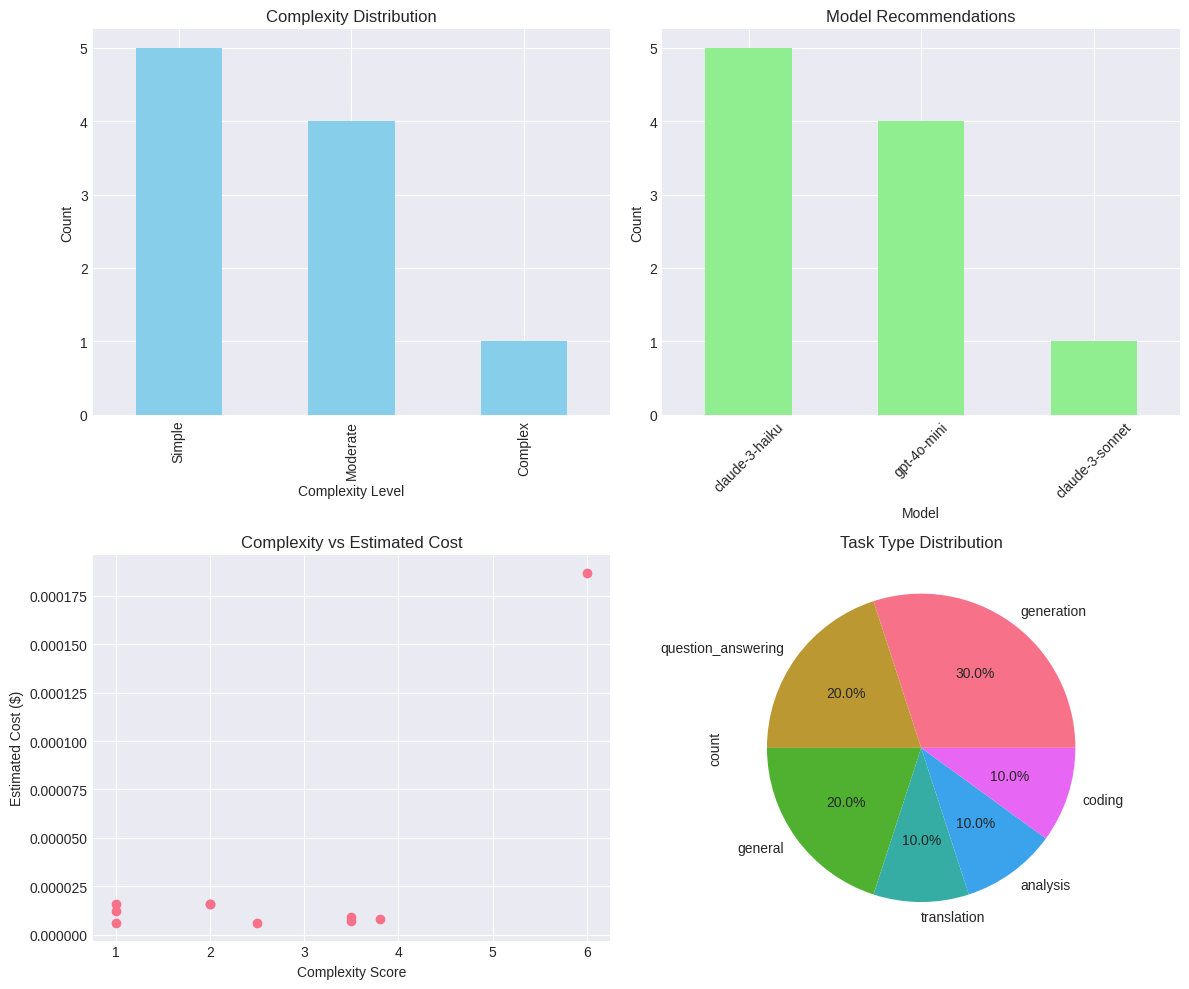

In [6]:
def batch_analyze_prompts(prompts: List[str], save_results: bool = True) -> pd.DataFrame:
    """Analyze multiple prompts and return results as DataFrame"""

    results = []

    for i, prompt in enumerate(prompts):
        print(f"Analyzing prompt {i+1}/{len(prompts)}...", end='\r')

        # Route the prompt
        routing = router.route(prompt)

        if 'error' in routing:
            results.append({
                'prompt': prompt[:50] + '...' if len(prompt) > 50 else prompt,
                'recommended_model': 'ERROR',
                'complexity': 'N/A',
                'cost_per_1k': 0,
                'estimated_cost': 0,
                'domains': 'N/A'
            })
            continue

        analysis = routing['analysis']
        profile = routing['model_profile']
        costs = routing['estimated_costs']

        results.append({
            'prompt': prompt[:50] + '...' if len(prompt) > 50 else prompt,
            'recommended_model': routing['recommended_model'],
            'complexity': analysis['complexity_level'],
            'complexity_score': analysis['complexity_score'],
            'cost_per_1k': profile.avg_cost_per_1k,
            'estimated_cost': costs['estimated_total_cost'],
            'domains': ', '.join(analysis['domains']) if analysis['domains'] else 'General',
            'word_count': analysis['word_count'],
            'task_type': analysis['task_type']
        })

    df = pd.DataFrame(results)

    if save_results:
        df.to_csv('model_routing_results.csv', index=False)
        print(f"\n✅ Results saved to 'model_routing_results.csv'")

    return df

# Example batch analysis
test_prompts = [
    "What is 2+2?",
    "Explain quantum computing to a 5-year-old",
    "Write a Python web scraper with error handling",
    "Create a business plan for a sustainable coffee shop",
    "Translate this technical manual from English to Japanese",
    "Analyze this image and identify all objects",
    "Debug this React component that's causing infinite re-renders",
    "Write a research paper on climate change impacts",
    "Quick, what's the weather in Tokyo?",
    "Design a microservices architecture for an e-commerce platform"
]

print_colored("📊 Running Batch Analysis...", 'blue')
batch_df = batch_analyze_prompts(test_prompts)
display(batch_df)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Complexity distribution
batch_df['complexity'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Complexity Distribution')
axes[0, 0].set_xlabel('Complexity Level')
axes[0, 0].set_ylabel('Count')

# Model recommendations
batch_df['recommended_model'].value_counts().plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Model Recommendations')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Cost distribution
axes[1, 0].scatter(batch_df['complexity_score'], batch_df['estimated_cost'])
axes[1, 0].set_title('Complexity vs Estimated Cost')
axes[1, 0].set_xlabel('Complexity Score')
axes[1, 0].set_ylabel('Estimated Cost ($)')

# Task types
batch_df['task_type'].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Task Type Distribution')

plt.tight_layout()
plt.show()